In [7]:
%load_ext autoreload 
%autoreload 2

import yaml
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from pathlib import Path
import torch
from torch.utils.data import DataLoader, ConcatDataset
import torchaudio

from fusanet_utils.datasets.aumilab import AUMILAB
from fusanet_utils.datasets.fusa import FUSA_dataset
from fusanet_utils.transforms import Collate_and_transform

scenarios = {0:'square', 1:'park', 2:'waterfront', 3:'market', 4:'street'}
is_scenario = lambda filename: [key for key, scene in scenarios.items() if scene in filename][0]
    
preds_soft, labels, distances, places, names = [], [], [], [], []
#experiment_path = Path('../../experiments/Poliphonic-PANN-sed-no-pretrained-valid-loss/')
experiment_path = Path('../../experiments/Poliphonic-PANN-sed-no-pretrained/')
print(experiment_path)

categories = json.load(open(str(experiment_path / 'index_to_name.json')))
fusa_taxonomy = json.load(open('../../fusa_taxonomy.json'))
taxonony_translator = {label: key for key, value in fusa_taxonomy.items() for label in value['SPASS']}
translated_categories = {key: taxonony_translator[value] for key, value in categories.items()}  

model = torch.load(str(experiment_path / 'model.pt'))
model.eval()
params = yaml.safe_load(open(str(experiment_path / 'params.yaml')))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
../../experiments/Poliphonic-PANN-sed-no-pretrained


In [8]:
dataset = AUMILAB('../..', categories=translated_categories.values())

fusa_dataset = FUSA_dataset(ConcatDataset([dataset]), params)
fusa_loader = DataLoader(fusa_dataset, batch_size=10, shuffle=False, pin_memory=True, num_workers=2,
                         collate_fn=Collate_and_transform(params["features"]))

In [22]:
categories

{'0': 'Vwater',
 '1': 'air_conditioner',
 '2': 'airborne',
 '3': 'alarm',
 '4': 'bells',
 '5': 'bird',
 '6': 'braking',
 '7': 'bus_idling',
 '8': 'bus_moving',
 '9': 'car_idling',
 '10': 'car_moving',
 '11': 'crowd',
 '12': 'cutting',
 '13': 'dog',
 '14': 'drilling',
 '15': 'explosives',
 '16': 'fireworks',
 '17': 'horn',
 '18': 'impact',
 '19': 'motorcycle_idling',
 '20': 'motorcycle_moving',
 '21': 'music',
 '22': 'rain',
 '23': 'river',
 '24': 'shouting',
 '25': 'siren',
 '26': 'steps',
 '27': 'talk',
 '28': 'truck_idling',
 '29': 'truck_moving',
 '30': 'water',
 '31': 'waves',
 '32': 'wind'}

In [27]:
categories

{'0': 'Vwater',
 '1': 'air_conditioner',
 '2': 'airborne',
 '3': 'alarm',
 '4': 'bells',
 '5': 'bird',
 '6': 'braking',
 '7': 'bus_idling',
 '8': 'bus_moving',
 '9': 'car_idling',
 '10': 'car_moving',
 '11': 'crowd',
 '12': 'cutting',
 '13': 'dog',
 '14': 'drilling',
 '15': 'explosives',
 '16': 'fireworks',
 '17': 'horn',
 '18': 'impact',
 '19': 'motorcycle_idling',
 '20': 'motorcycle_moving',
 '21': 'music',
 '22': 'rain',
 '23': 'river',
 '24': 'shouting',
 '25': 'siren',
 '26': 'steps',
 '27': 'talk',
 '28': 'truck_idling',
 '29': 'truck_moving',
 '30': 'water',
 '31': 'waves',
 '32': 'wind'}

In [26]:
translated_categories

{'0': 'vehicles/water',
 '1': 'mechanical/air_conditioner',
 '2': 'vehicles/airborne',
 '3': 'alerts/alarms',
 '4': 'alerts/bells',
 '5': 'animal/bird',
 '6': 'alerts/braking and skidding',
 '7': 'vehicles/bus',
 '8': 'vehicles/bus',
 '9': 'vehicles/cars',
 '10': 'vehicles/cars',
 '11': 'humans/crowd',
 '12': 'mechanical/cutting',
 '13': 'animal/dog',
 '14': 'mechanical/digging',
 '15': 'mechanical/explosives',
 '16': 'mechanical/explosives',
 '17': 'alerts/horns',
 '18': 'mechanical/impact',
 '19': 'vehicles/motorcycles',
 '20': 'vehicles/motorcycles',
 '21': 'music/music',
 '22': 'environmental/rain',
 '23': 'environmental/river',
 '24': 'humans/shouting',
 '25': 'alerts/siren',
 '26': 'humans/others',
 '27': 'humans/talk',
 '28': 'vehicles/bus',
 '29': 'vehicles/bus',
 '30': 'environmental/water',
 '31': 'environmental/waves',
 '32': 'environmental/wind'}

In [21]:
preds = preds_model[0]

preds_reduced = torch.zeros(preds.shape[0], preds.shape[1], len(dataset.categories))
for key, value in categories.items()
    preds_reduced[:, :, ]

torch.Size([10, 6001, 27])

In [3]:
preds_model, labels_model, file_names = [], [], []
with torch.no_grad():
    for sample in tqdm(fusa_loader):
        preds_model.append(model(sample).numpy())
        labels_model.append(sample['label'].numpy())
        file_names.append(sample['filename'])
        break
preds_soft.append(np.concatenate(preds_model))
labels.append(np.concatenate(labels_model))
names.append(np.concatenate(file_names))

  0%|          | 0/127 [00:00<?, ?it/s]

In [6]:
categories

{'0': 'vehicles/water',
 '1': 'mechanical/air_conditioner',
 '2': 'vehicles/airborne',
 '3': 'alerts/alarms',
 '4': 'alerts/bells',
 '5': 'animal/bird',
 '6': 'alerts/braking and skidding',
 '7': 'vehicles/bus',
 '8': 'vehicles/bus',
 '9': 'vehicles/cars',
 '10': 'vehicles/cars',
 '11': 'humans/crowd',
 '12': 'mechanical/cutting',
 '13': 'animal/dog',
 '14': 'mechanical/digging',
 '15': 'mechanical/explosives',
 '16': 'mechanical/explosives',
 '17': 'alerts/horns',
 '18': 'mechanical/impact',
 '19': 'vehicles/motorcycles',
 '20': 'vehicles/motorcycles',
 '21': 'music/music',
 '22': 'environmental/rain',
 '23': 'environmental/river',
 '24': 'humans/shouting',
 '25': 'alerts/siren',
 '26': 'humans/others',
 '27': 'humans/talk',
 '28': 'vehicles/bus',
 '29': 'vehicles/bus',
 '30': 'environmental/water',
 '31': 'environmental/waves',
 '32': 'environmental/wind'}

In [5]:
preds_model[0].shape

(10, 6001, 33)

ValueError: operands could not be broadcast together with shapes (33,6001) (27,6001) 

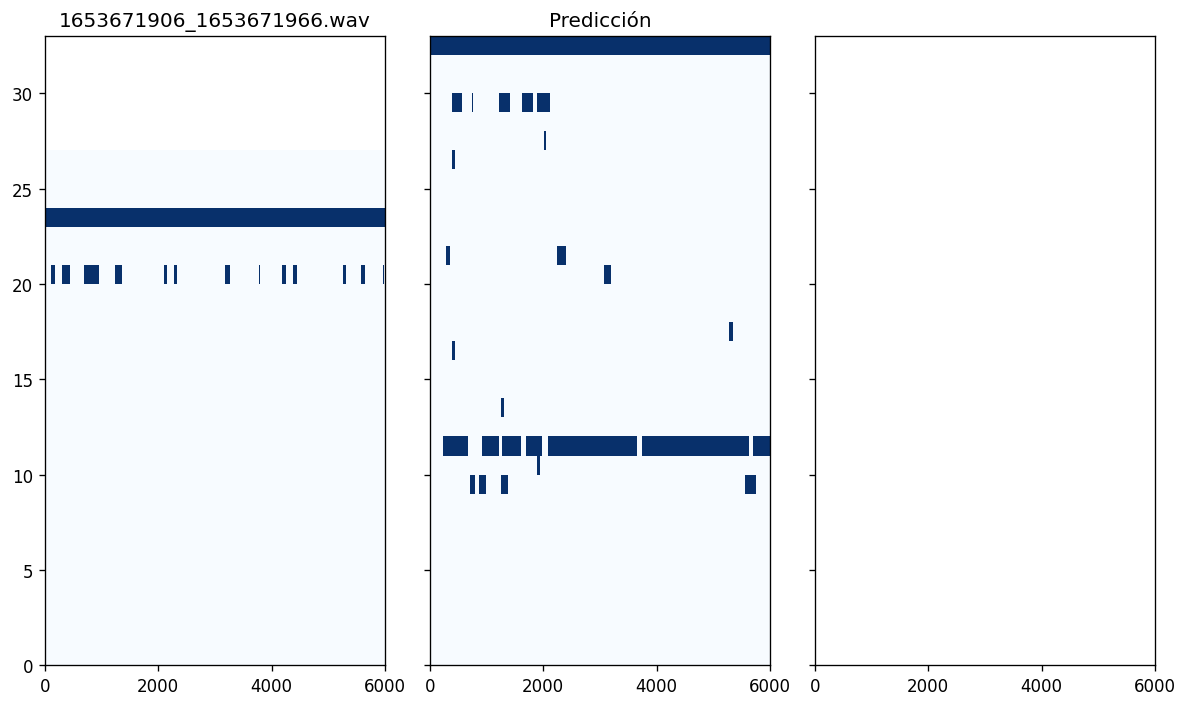

In [45]:
from IPython.display import Audio

def plot_file_prediction(model: int, idx: int, th: float=None):
    if th is not None:
        pred = (preds_soft[model][idx] > th).T#[3:, :]
    
    label = labels[model][idx].T
    fig, ax = plt.subplots(1, 3, figsize=(10, 6), facecolor='w', dpi=120,
                           tight_layout=True, sharex=True, sharey=True)
    ax[0].pcolormesh(label, cmap=plt.cm.Blues, vmin=0, vmax=1)
    ax[1].pcolormesh(pred, cmap=plt.cm.Blues, vmin=0, vmax=1)
    ax[0].set_title(names[model][idx])
    ax[1].set_title('Predicción')
    cmap = ax[2].pcolormesh((pred - label), cmap=plt.cm.RdBu, vmin=-1, vmax=1)
    fig.colorbar(cmap)
    ax[2].set_title('Error')
    ax[0].set_yticks(np.arange(0, len(dataset.categories), step=1) + 0.5)
    ax[0].set_yticklabels((dataset.categories));
    ax[0].grid()
    ax[1].grid()
    ax[2].grid()
    
    return Audio(Path('../datasets/AUMILAB/audios/') / names[model][idx])
    
plot_file_prediction(0, 1, 0.3)
#plot_file_prediction(1, 90, 0.3)